<a href="https://colab.research.google.com/github/mohitsbh/Ai_Learn_codes/blob/main/Nnfs8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Cluster Centers:
[[1.42360109 1.48893016]
 [5.53814589 5.46095406]
 [3.4121258  3.5389035 ]]


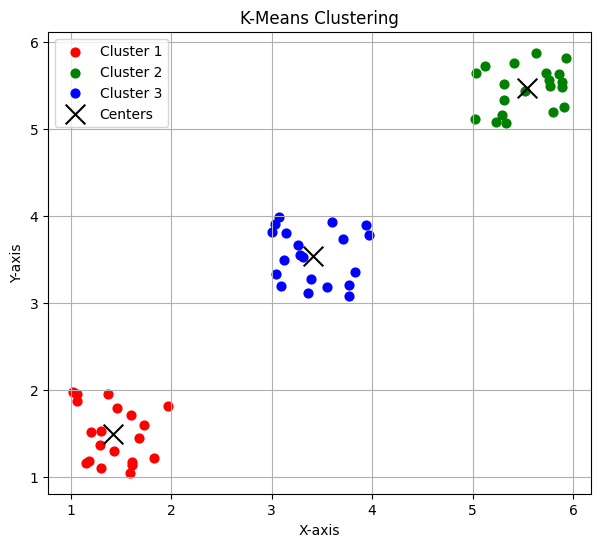

In [1]:
# NNFS 8 - Unsupervised Learning: K-Means Clustering

import numpy as np
import matplotlib.pyplot as plt

# 1. Create some random 2D data points
np.random.seed(42)
data = np.vstack([
    np.random.rand(20, 2) + 1,  # cluster 1
    np.random.rand(20, 2) + 3,  # cluster 2
    np.random.rand(20, 2) + 5   # cluster 3
])

# 2. Number of clusters
K = 3

# 3. Initialize cluster centers randomly
n_samples, n_features = data.shape
centers = data[np.random.choice(n_samples, K, replace=False)]

# 4. Function to compute Euclidean distance
def dist(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# 5. K-Means algorithm
max_iter = 20
for _ in range(max_iter):
    # Assign each point to the nearest cluster
    labels = np.zeros(n_samples, dtype=int)
    for i in range(n_samples):
        distances = [dist(data[i], centers[k]) for k in range(K)]
        labels[i] = np.argmin(distances)

    # Update cluster centers
    for k in range(K):
        cluster_points = data[labels == k]
        if len(cluster_points) > 0:
            centers[k] = np.mean(cluster_points, axis=0)

# 6. Display final cluster centers
print("Final Cluster Centers:")
print(centers)

# 7. Plot clusters
plt.figure(figsize=(7, 6))
colors = ['red', 'green', 'blue']
for k in range(K):
    cluster_points = data[labels == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                s=40, color=colors[k], label=f'Cluster {k+1}')

plt.scatter(centers[:, 0], centers[:, 1],
            c='black', marker='x', s=200, label='Centers')

plt.title("K-Means Clustering")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()